In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pathlib import Path

folderpath="../pics/GreaterLondon-pre/"
Path(folderpath).mkdir(parents=True, exist_ok=True)
place_arr=["SouthWest","SouthEast","GreaterLondon"]


In [36]:
opsd_daily = pd.read_csv('GreaterLondon.csv', index_col=0, parse_dates=True)


In [37]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Demand MWh,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2020-06-18 05:00:00,1434.528434,1.333333,79.000000,80.333333,2020,6,Thursday
2020-12-13 02:00:00,1947.306193,11.333333,0.000000,11.333333,2020,12,Sunday
2020-01-10 17:00:00,2895.266197,9.333333,2.000000,11.333333,2020,1,Friday
2020-02-10 22:00:00,2605.476813,6.333333,0.000000,6.333333,2020,2,Monday
2020-09-05 16:00:00,1988.377972,8.333333,1137.333333,1145.666667,2020,9,Saturday


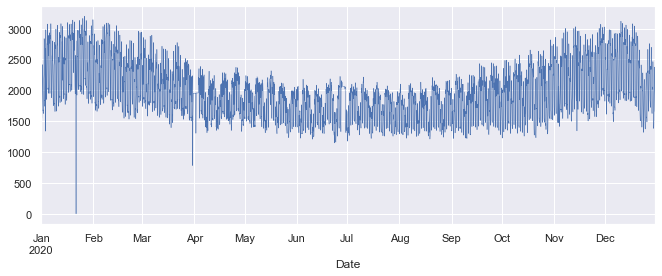

In [38]:
sns.set(rc={'figure.figsize':(11, 4)})
opsd_daily['Demand MWh'].plot(linewidth=0.5).figure.savefig(folderpath+"Demand MWh.png")


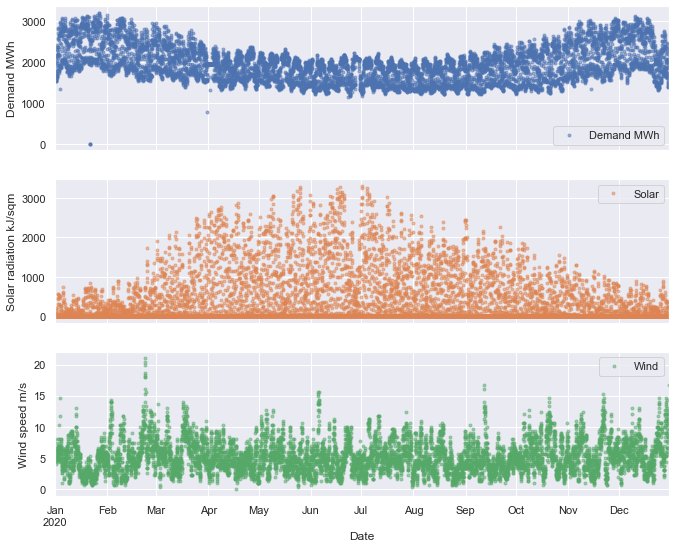

In [39]:
cols_plot = ['Demand MWh', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


axes[0].set_ylabel("Demand MWh")
axes[1].set_ylabel("Solar radiation kJ/sqm")
axes[2].set_ylabel("Wind speed m/s")

plt.savefig(folderpath+"Daily Totals (GWh).png")




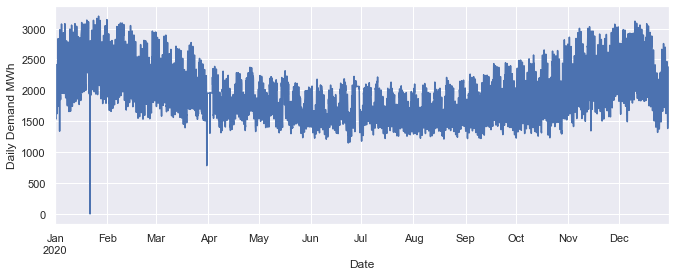

In [40]:
ax = opsd_daily.loc['2020', 'Demand MWh'].plot()
ax.set_ylabel('Daily Demand MWh');

plt.savefig(folderpath+"Daily Demand MWh (MWh).png")


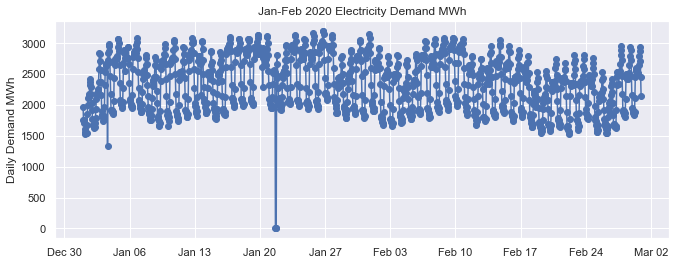

In [41]:
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2020-01':'2020-02', 'Demand MWh'], marker='o', linestyle='-')
ax.set_ylabel('Daily Demand MWh')
ax.set_title('Jan-Feb 2020 Electricity Demand MWh')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.savefig(folderpath+"Jan-Feb 2020 Electricity Demand MWh.png")


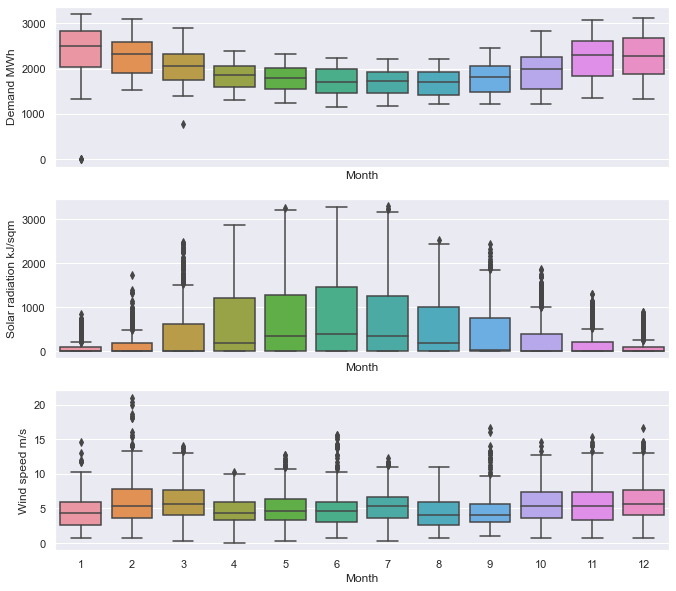

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Demand MWh', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
ax.set_ylabel('Wind speed m/s')
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
axes[1].set_ylabel("Solar radiation kJ/sqm")   
plt.savefig(folderpath+"box.png")


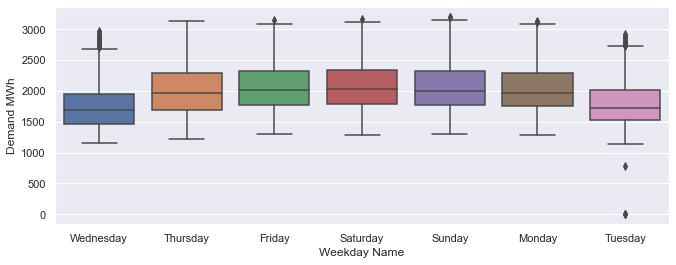

In [43]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Demand MWh');
plt.savefig(folderpath+"Weekdaybox.png")


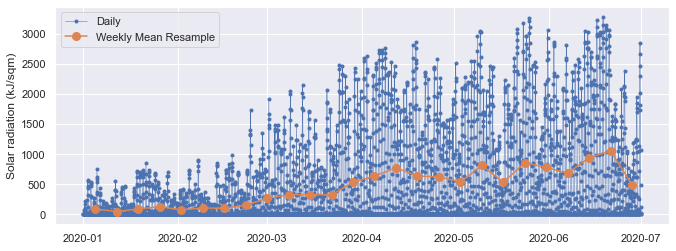

In [44]:
# Start and end of the date range to extract
start, end = '2020-01', '2020-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
data_columns = ['Demand MWh', 'Wind', 'Solar', 'Wind+Solar']

opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()

ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar radiation (kJ/sqm)')
ax.legend();
plt.savefig(folderpath+"Solar radiatio.png")


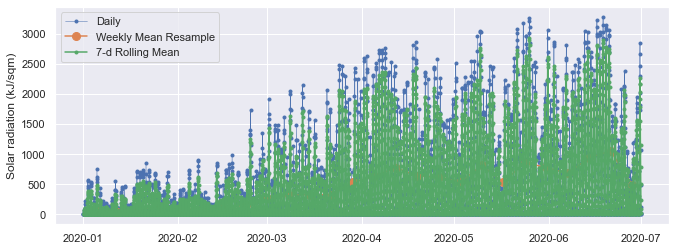

In [45]:
# Start and end of the date range to extract
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()

start, end = '2020-01', '2020-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar radiation (kJ/sqm)')
ax.legend();
plt.savefig(folderpath+"Solar radiati.png")


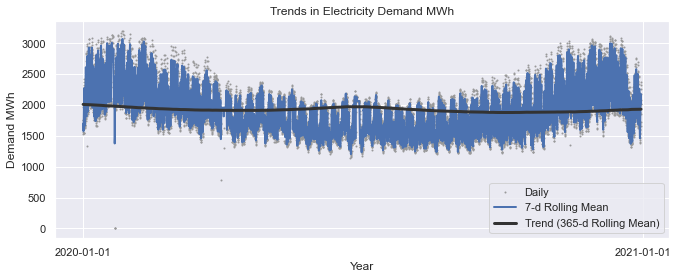

In [46]:
opsd_365d = opsd_daily[data_columns].rolling(window=8760, center=True,min_periods=360).mean()
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily['Demand MWh'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_7d['Demand MWh'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Demand MWh'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Demand MWh')
ax.set_title('Trends in Electricity Demand MWh');

plt.savefig(folderpath+"Trends in Electricity Demand MWh.png")


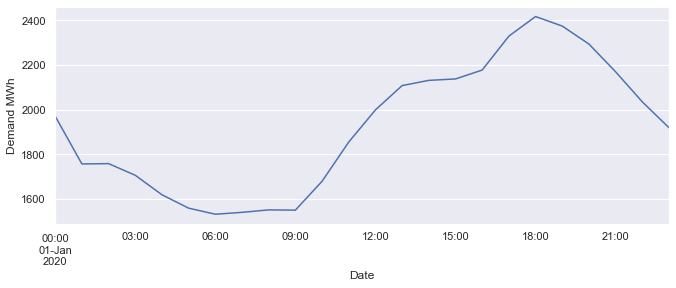

In [47]:
opsd_daily["Demand MWh"].loc['2020-1-1':'2020-1-1'].plot()
plt.ylabel("Demand MWh")
plt.savefig(folderpath+"2020-1-1.png")




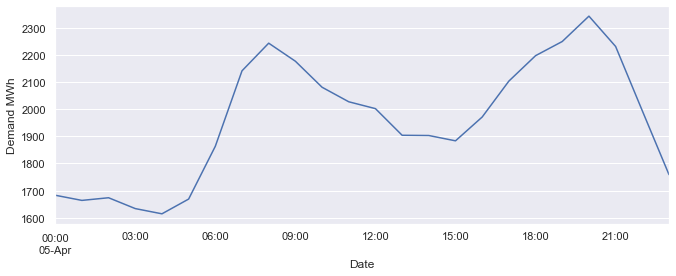

In [55]:
opsd_daily["Demand MWh"].loc['2020-4-5':'2020-4-5'].plot()
plt.ylabel("Demand MWh")
plt.savefig(folderpath+"2020-4-1.png")

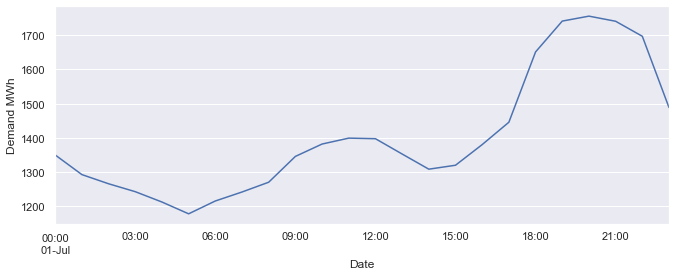

In [49]:
opsd_daily["Demand MWh"].loc['2020-7-1':'2020-7-1'].plot()
plt.ylabel("Demand MWh")

plt.savefig(folderpath+"2020-7-1.png")

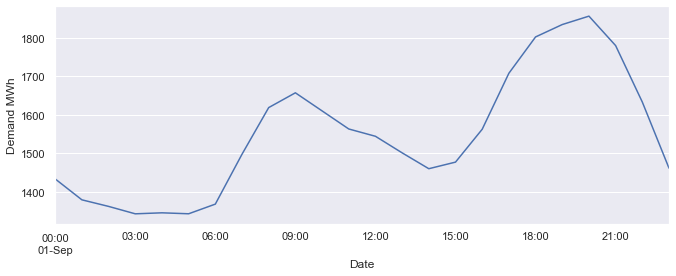

In [50]:
opsd_daily["Demand MWh"].loc['2020-9-1':'2020-9-1'].plot()
plt.ylabel("Demand MWh")

plt.savefig(folderpath+"2020-9-1.png")